# Introduction to Optimus

## Install

From command line:

```
pip install optimuspyspark
```

from a notebook you can use:

```
!pip install optimuspyspark
```

In [1]:
!pip install --user optimuspyspark

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


A good thing to do here is to restart the kernel. 

In [2]:
# Checking the installation
from optimus import Optimus
op= Optimus(master="local")

## DataFrame creation

Create a dataframe to passing a list of values for columns and rows. Unlike pandas you need to specify the column names.

In [4]:
df = op.create.df(
    [
        "names",
        "height(ft)",
        "function",
        "rank",
        "weight(t)",
        "japanese name",
        "last position",
        "attributes"
    ],
    [
        
        ("Optim'us", 28.0, "Leader", 10, 4.3, ["Inochi", "Convoy"], "19.442735,-99.201111",[8.5344, 4300.0]),
        ("bumbl#ebéé  ", 17.5, "Espionage", 7, 2.0, ["Bumble","Goldback"], "10.642707,-71.612534",[5.334, 2000.0]),
        ("ironhide&", 26.0, "Security", 7, 4.0, ["Roadbuster"], "37.789563,-122.400356",[7.9248, 4000.0]),
        ("Jazz",13.0, "First Lieutenant", 8, 1.8, ["Meister"], "33.670666,-117.841553",[3.9624, 1800.0]),
        ("Megatron",None, "None", None, 5.7, ["Megatron"], None,[None,5700.0]),
        ("Metroplex_)^$",300.0 , "Battle Station", 8, None, ["Metroflex"],None,[91.44, None]),
        
    ])

In [5]:
# View the data with plain spark
df.show() #ugly

+-------------+----------+----------------+----+---------+------------------+--------------------+----------------+
|        names|height(ft)|        function|rank|weight(t)|     japanese name|       last position|      attributes|
+-------------+----------+----------------+----+---------+------------------+--------------------+----------------+
|     Optim'us|      28.0|          Leader|  10|      4.3|  [Inochi, Convoy]|19.442735,-99.201111|[8.5344, 4300.0]|
| bumbl#ebéé  |      17.5|       Espionage|   7|      2.0|[Bumble, Goldback]|10.642707,-71.612534| [5.334, 2000.0]|
|    ironhide&|      26.0|        Security|   7|      4.0|      [Roadbuster]|37.789563,-122.40...|[7.9248, 4000.0]|
|         Jazz|      13.0|First Lieutenant|   8|      1.8|         [Meister]|33.670666,-117.84...|[3.9624, 1800.0]|
|     Megatron|      null|            None|null|      5.7|        [Megatron]|                null|      [, 5700.0]|
|Metroplex_)^$|     300.0|  Battle Station|   8|     null|       [Metrof

In [7]:
# View the data with Optimus
df.table() #prettier

names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable
28.0,Optim'us,Leader,4.300000190734863,10,"19.442735,-99.201111","[8.53439998626709,⸱4300.0]","['Inochi',⸱'Convoy']"
17.5,bumbl#ebéé⸱⸱,Espionage,2.0,7,"10.642707,-71.612534","[5.334000110626221,⸱2000.0]","['Bumble',⸱'Goldback']"
26.0,ironhide&,Security,4.0,7,"37.789563,-122.400356","[7.924799919128418,⸱4000.0]",['Roadbuster']
13.0,Jazz,First⸱Lieutenant,1.7999999523162842,8,"33.670666,-117.841553","[3.962399959564209,⸱1800.0]",['Meister']
None,Megatron,None,5.699999809265137,None,None,"[None,⸱5700.0]",['Megatron']
300.0,Metroplex_)^$,Battle⸱Station,None,8,None,"[91.44000244140625,⸱None]",['Metroflex']



Creating a dataframe by passing a list of tuples specifyng the column data type. You can specify as data type an string or a Spark Datatypes. https://spark.apache.org/docs/latest/api/java/org/apache/spark/sql/types/package-summary.html

Also you can use some Optimus predefined types:

- "str" = StringType()
- "int" = IntegerType()
- "float" = FloatType()
- "bool" = BoleanType()

In [8]:
f = op.create.df(
    [
        ("names", "str"),
        ("height", "float"),
        ("function", "str"),
        ("rank", "int"),
    ],
    [
        ("bumbl#ebéé  ", 17.5, "Espionage", 7),
        ("Optim'us", 28.0, "Leader", 10),
        ("ironhide&", 26.0, "Security", 7),
        ("Jazz",13.0, "First Lieutenant", 8),
        ("Megatron",None, "None", None),
        
    ])
df.table()

names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable
28.0,Optim'us,Leader,4.300000190734863,10,"19.442735,-99.201111","[8.53439998626709,⸱4300.0]","['Inochi',⸱'Convoy']"
17.5,bumbl#ebéé⸱⸱,Espionage,2.0,7,"10.642707,-71.612534","[5.334000110626221,⸱2000.0]","['Bumble',⸱'Goldback']"
26.0,ironhide&,Security,4.0,7,"37.789563,-122.400356","[7.924799919128418,⸱4000.0]",['Roadbuster']
13.0,Jazz,First⸱Lieutenant,1.7999999523162842,8,"33.670666,-117.841553","[3.962399959564209,⸱1800.0]",['Meister']
None,Megatron,None,5.699999809265137,None,None,"[None,⸱5700.0]",['Megatron']
300.0,Metroplex_)^$,Battle⸱Station,None,8,None,"[91.44000244140625,⸱None]",['Metroflex']


## Creating a Daframe using a pandas dataframe

import pandas as pd
import numpy as np

data = [("bumbl#ebéé  ", 17.5, "Espionage", 7),
         ("Optim'us", 28.0, "Leader", 10),
         ("ironhide&", 26.0, "Security", 7)]
labels = ["names", "height", "function", "rank"]

# Create pandas dataframe
pdf = pd.DataFrame.from_records(data, columns=labels)

df = op.create.df(pdf = pdf)
df.table()

## Columns and Rows

Optimus organized operations in columns and rows. This is a little different of how pandas works in which all operations are around the pandas class. We think this approach can better help you to access and transform data.

In [11]:
df.cols.sort().table()

function 1 (string) nullable,height 2 (double) nullable,names 3 (string) nullable,rank 4 (bigint) nullable
7,17.5,Espionage,bumbl#ebéé⸱⸱
10,28.0,Leader,Optim'us
7,26.0,Security,ironhide&


In [12]:
df.rows.sort("rank").table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
10,Optim'us,Leader,28.0
7,bumbl#ebéé⸱⸱,Espionage,17.5
7,ironhide&,Security,26.0


## Selection

Unlike Pandas, Spark DataFrames don't support random row access. So methods like loc in pandas are not available.

Also Pandas don't handle indexes. So methods like iloc are not available.

In [13]:
# Select an show an specific column
df.cols.select("names").table()

names 1 (string) nullable
bumbl#ebéé⸱⸱
Optim'us
ironhide&


In [14]:
# This works with plain Spark too
df.select("names").table()

names 1 (string) nullable
bumbl#ebéé⸱⸱
Optim'us
ironhide&


In [15]:
# Select rows from a DataFrame where a the condition is meet
df.rows.select(df["rank"]>7).table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
10,Optim'us,Leader,28.0


In [17]:
# This is something like a filter in Spark
df.filter(df["rank"]>7).table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
10,Optim'us,Leader,28.0


This may seem weird, why we are overriding some functions, but it was needed to add more functionalities that Spark won't handle.

In [18]:
# Creating an id for a DF
df.create_id().table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable,id 5 (bigint)
7,bumbl#ebéé⸱⸱,Espionage,17.5,0
10,Optim'us,Leader,28.0,1
7,ironhide&,Security,26.0,2


In [23]:
# Creating new columns

df.cols.append("new_col",1).table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable,new_col 5 (int)
7,bumbl#ebéé⸱⸱,Espionage,17.5,1
10,Optim'us,Leader,28.0,1
7,ironhide&,Security,26.0,1


In plain Spark to do the same you will need to do:

In [25]:
from pyspark.sql.functions import lit
df.withColumn("new_col", lit(1)).table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable,new_col 5 (int)
7,bumbl#ebéé⸱⸱,Espionage,17.5,1
10,Optim'us,Leader,28.0,1
7,ironhide&,Security,26.0,1


Which is not straightforward at all. 

## Creating a simple plot

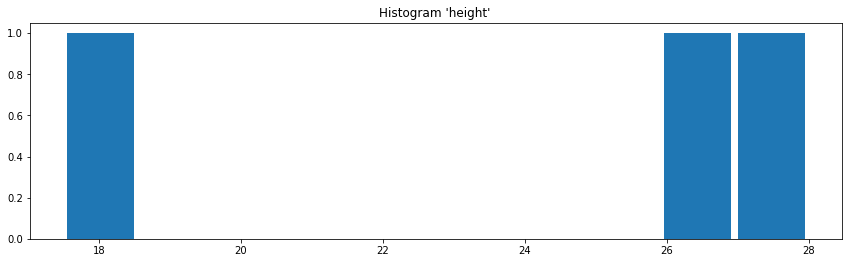

In [27]:
df.plot.hist("height",10)

Yes now you can plot spark DF that easy. 

## Reading external data

In [43]:
op.load.csv("foo.csv", header=True).show()

+---+--------------------+--------------------+---------+----------+-----+----------+--------+
| id|           firstName|            lastName|billingId|   product|price|     birth|dummyCol|
+---+--------------------+--------------------+---------+----------+-----+----------+--------+
|  1|                Luis|         Alvarez$$%!|      123|      Cake|   10|1980/07/07|   never|
|  2|               André|              Ampère|      423|      piza|    8|1950/07/08|   gonna|
|  3|               NiELS|          Böhr//((%%|      551|     pizza|    8|1990/07/09|    give|
|  4|                PAUL|              dirac$|      521|     pizza|    8|1954/07/10|     you|
|  5|              Albert|            Einstein|      634|     pizza|    8|1990/07/11|      up|
|  6|             Galileo|             GALiLEI|      672|     arepa|    5|1930/08/12|   never|
|  7|                CaRL|            Ga%%%uss|      323|      taco|    3|1970/07/13|   gonna|
|  8|               David|          H$$$ilbert|   

In [45]:
op.spark.read.csv("foo.csv", header=True).table()

id 1 (string) nullable,firstName 2 (string) nullable,lastName 3 (string) nullable,billingId 4 (string) nullable,product 5 (string) nullable,price 6 (string) nullable,birth 7 (string) nullable,dummyCol 8 (string) nullable
10,never,Alvarez$$%!,123,1980/07/07,Cake,Luis,1
8,gonna,Ampère,423,1950/07/08,piza,André,2
8,give,Böhr//((%%,551,1990/07/09,pizza,NiELS,3
8,you,dirac$,521,1954/07/10,pizza,PAUL,4
8,up,Einstein,634,1990/07/11,pizza,Albert,5
5,never,⸱⸱⸱⸱⸱⸱⸱⸱⸱⸱⸱⸱⸱GALiLEI,672,1930/08/12,arepa,Galileo,6
3,gonna,Ga%%%uss,323,1970/07/13,taco,CaRL,7
3,let,H$$$ilbert,624,1950/07/14,taaaccoo,David,8
3,you,KEPLER,735,1920/04/22,taco,Johannes,9
3,down,M$$ax%%well,875,1923/03/12,taco,JaMES,10
